<a href="https://colab.research.google.com/github/sujith1197/summer-internship-ML-/blob/main/SI_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Problem

Missing values in each column:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Model Performance Comparison:
                        MSE        R2
No Normalization  10.710864  0.790150
Standard Scaler   10.710864  0.790150
MinMax Scaler     10.710864  0.790150
Robust Scaler     10.710864  0.790150
L2 Normalizer     10.364135  0.796943


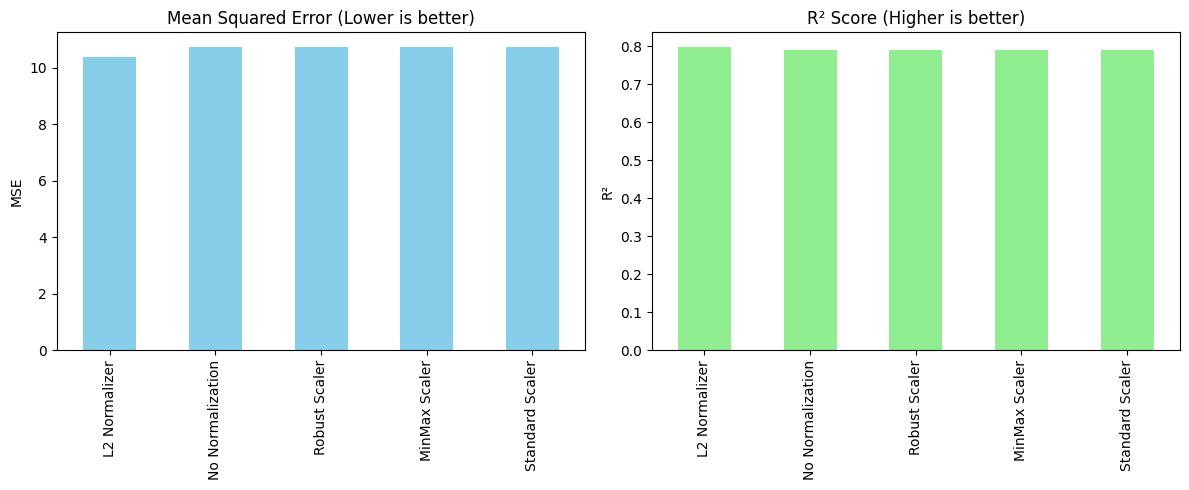

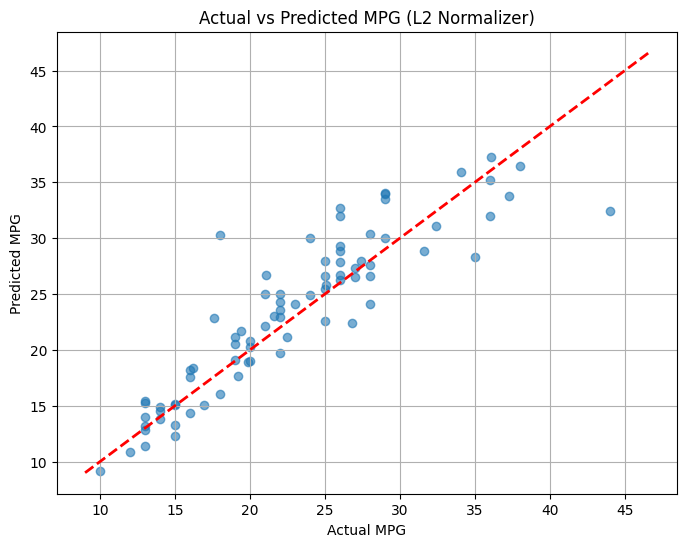

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                 RobustScaler, Normalizer)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('/content/ auto_mpg_clean.csv')

# Data preprocessing
# Drop car_name as it's not useful for regression
df = df.drop('car_name', axis=1)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Prepare features and target
X = df.drop('mpg', axis=1)
y = df['mpg']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define normalization methods to compare
normalizers = {
    'No Normalization': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler(),
    'L2 Normalizer': Normalizer()
}

# Dictionary to store results
results = {}

# Train models with different normalization techniques
for name, normalizer in normalizers.items():
    if normalizer is None:
        # No normalization
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Create pipeline with normalization and linear regression
        model = make_pipeline(normalizer, LinearRegression())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'model': model,
        'predictions': y_pred
    }

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Comparison:")
print(results_df[['MSE', 'R2']])

# Plot performance metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
results_df['MSE'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error (Lower is better)')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
results_df['R2'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('R² Score (Higher is better)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values for the best performing model
best_model_name = results_df['R2'].idxmax()
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title(f'Actual vs Predicted MPG ({best_model_name})')
plt.grid(True)
plt.show()

# Feature importance analysis (coefficients)

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Standard Scaling Results:
Accuracy: 0.8983
AUC: 0.8856
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.34      0.42       152

    accuracy                           0.90      1357
   macro avg       0.75      0.65      0.68      1357
weighted avg       0.88      0.90      0.89      1357


Min-Max Scaling Results:
Accuracy: 0.8954
AUC: 0.8825
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.57      0.26      0.36       152

    accuracy                           0.90      1357
   macro avg 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



No Scaling Results:
Accuracy: 0.8961
AUC: 0.8931
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.57      0.31      0.40       152

    accuracy                           0.90      1357
   macro avg       0.74      0.64      0.67      1357
weighted avg       0.88      0.90      0.88      1357



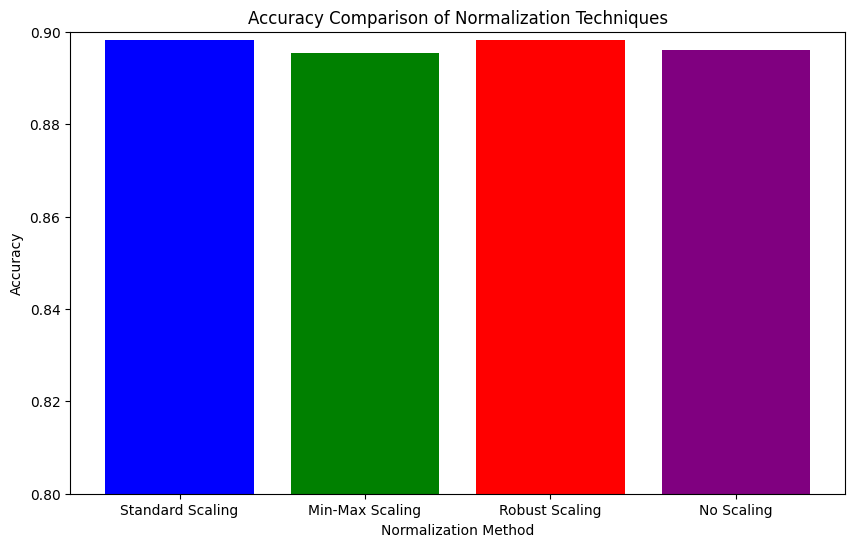

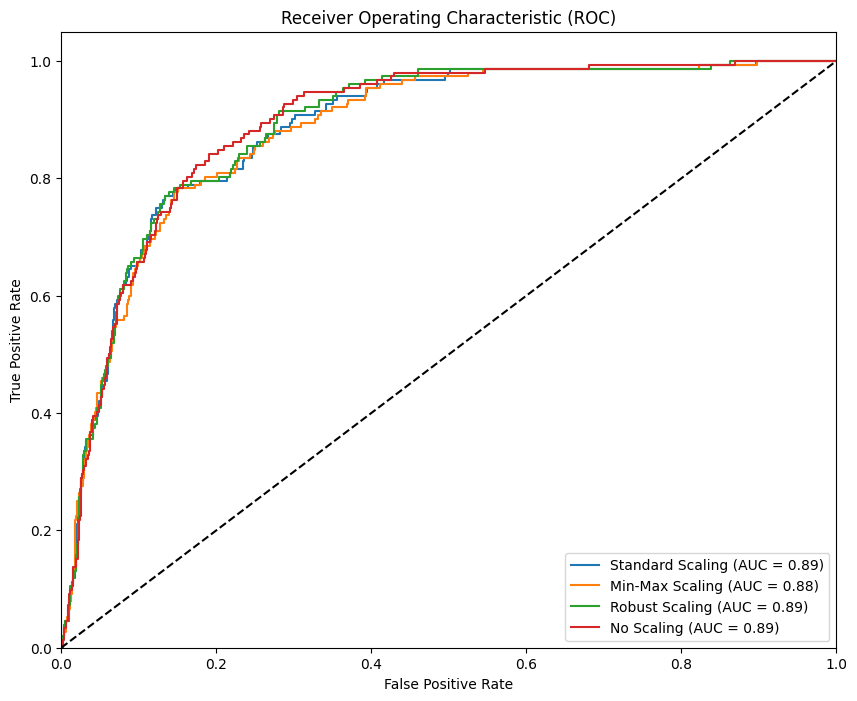

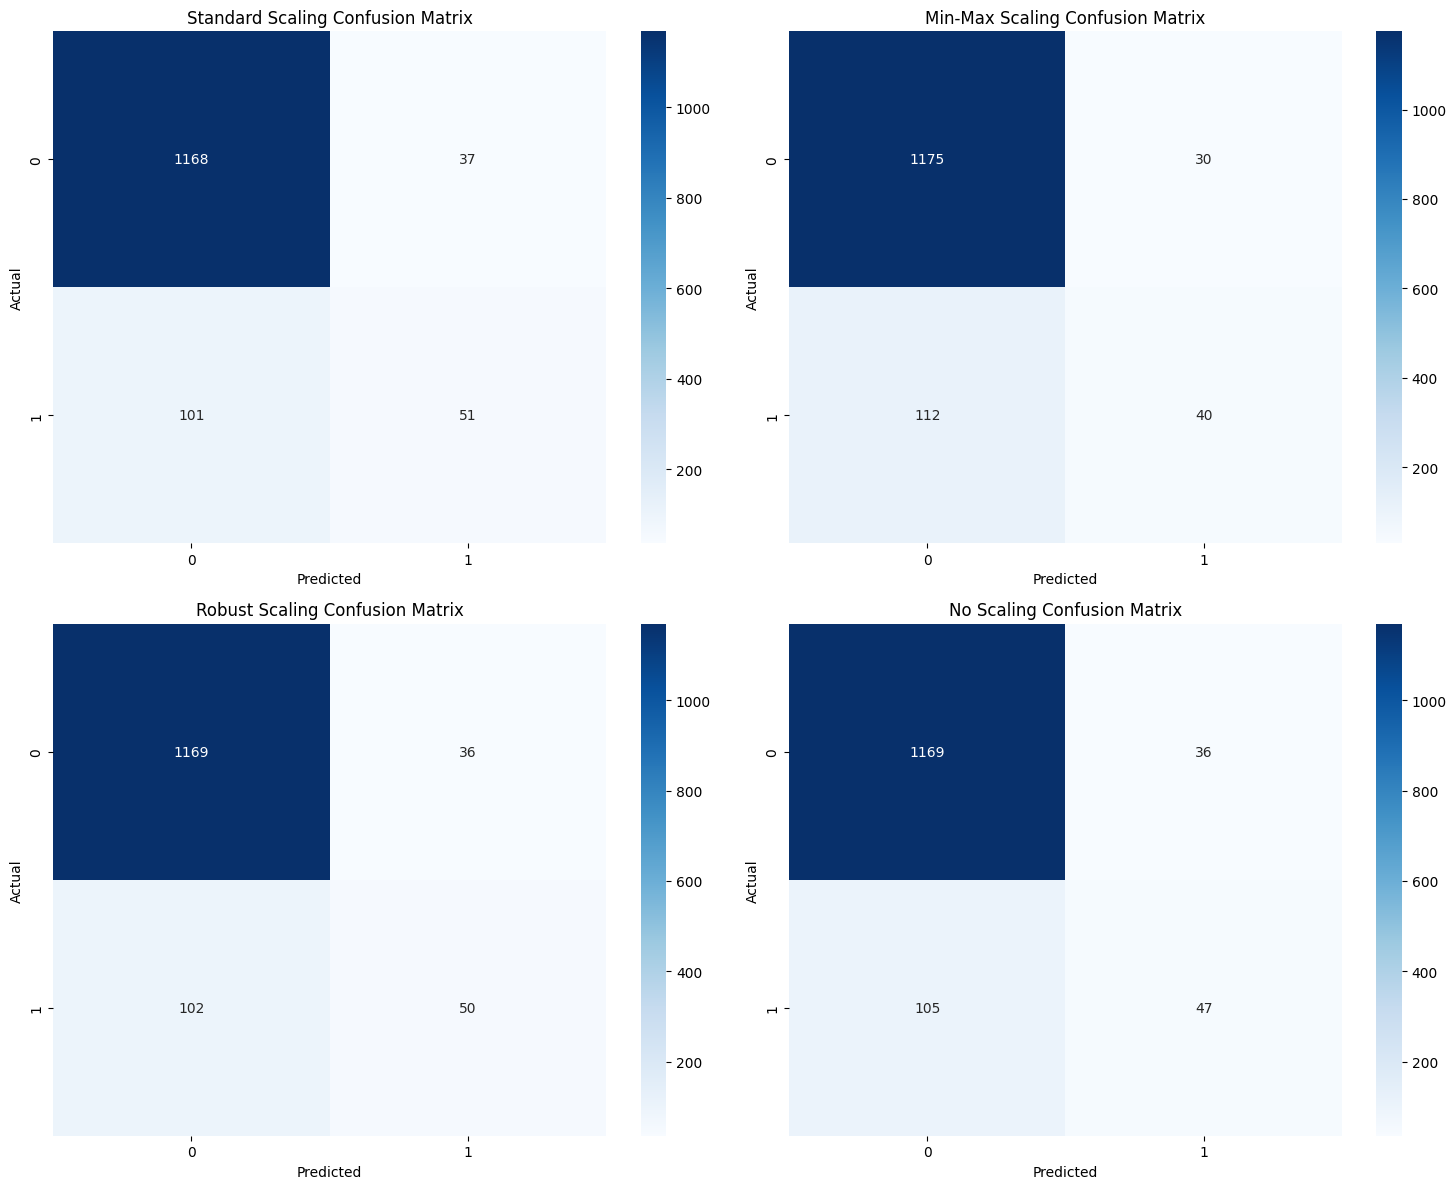

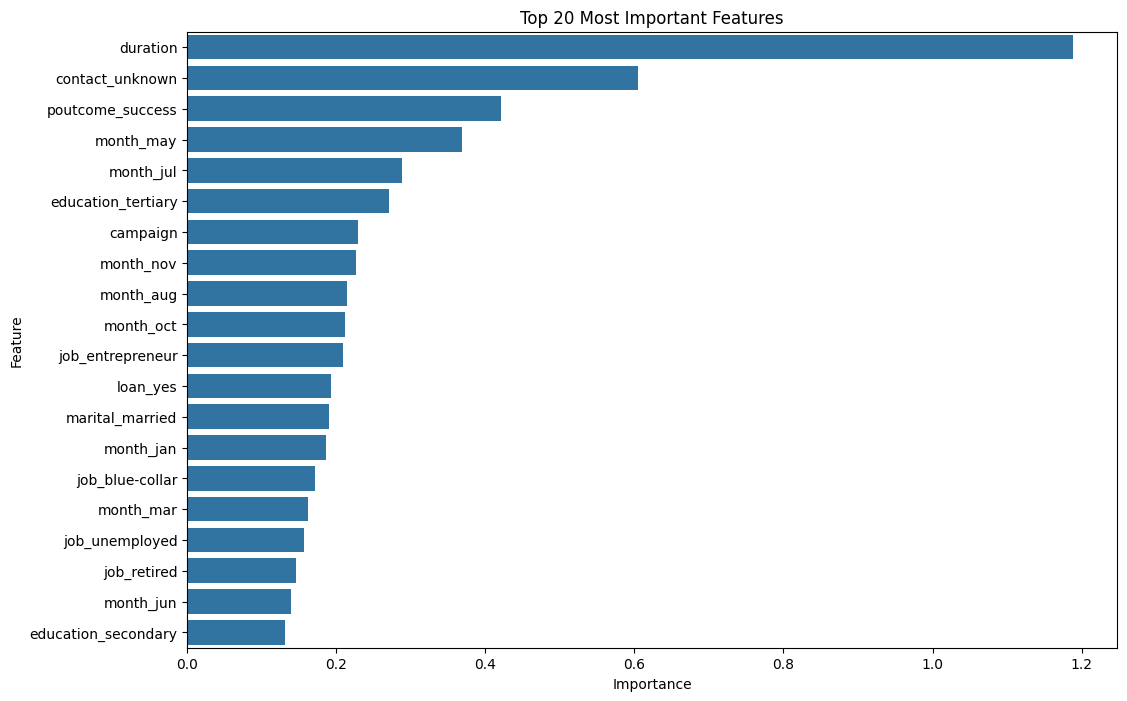

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/bank.csv', sep=';')

# Convert target variable to binary (1 for 'yes', 0 for 'no')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split into features and target
X = df.drop('y', axis=1)
y = df['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

robust = RobustScaler()
X_train_robust = robust.fit_transform(X_train)
X_test_robust = robust.transform(X_test)

# Initialize models
models = {
    'Standard Scaling': LogisticRegression(max_iter=1000),
    'Min-Max Scaling': LogisticRegression(max_iter=1000),
    'Robust Scaling': LogisticRegression(max_iter=1000),
    'No Scaling': LogisticRegression(max_iter=1000)
}

# Prepare datasets
datasets = {
    'Standard Scaling': (X_train_std, X_test_std),
    'Min-Max Scaling': (X_train_minmax, X_test_minmax),
    'Robust Scaling': (X_train_robust, X_test_robust),
    'No Scaling': (X_train, X_test)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    X_train_data, X_test_data = datasets[name]
    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'model': model
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot accuracy comparison
accuracies = [results[name]['accuracy'] for name in results]
names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Accuracy Comparison of Normalization Techniques')
plt.xlabel('Normalization Method')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name in results:
    plt.plot(results[name]['fpr'], results[name]['tpr'],
             label=f'{name} (AUC = {results[name]["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, name in enumerate(results):
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d',
                cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Get feature importance from the best performing model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']

# Get coefficients
if best_model_name != 'No Scaling':
    coefficients = best_model.coef_[0]
    feature_names = X.columns
else:
    coefficients = best_model.coef_[0]
    feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.show()